In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from Tree_matching import tree_matching

In [2]:
LiDAR_path = 'data/LiDAR.geojson'
aerial_photos_path = 'data/aerial_photos.geojson'

## 1. Individual tree matching

In [3]:
%%time
tree_matching(LiDAR_path, aerial_photos_path)

top: 3
preliminary matching finished
----------------------------------------
post matching finished
----------------------------------------
rectification finished
----------------------------------------
output_path:data/LiDAR_rectified.geojson
CPU times: total: 2.11 s
Wall time: 2.08 s


## 2. Visualization

In [4]:
# Open vector files
LiDAR = gpd.read_file(LiDAR_path)
aerial_photos = gpd.read_file(aerial_photos_path)
LiDAR_rectified = gpd.read_file('data/LiDAR_rectified.geojson')

# Define some drawing parameters
size = 10
fontsize = 12
pad=10
alpha = 0.8
color_1 = '#ff5f2e'
color_2 = '#39a0ed'
edgecolor='#616161'
plt.rcParams['figure.figsize'] = [size,size]

### 2.1 before rectificaton

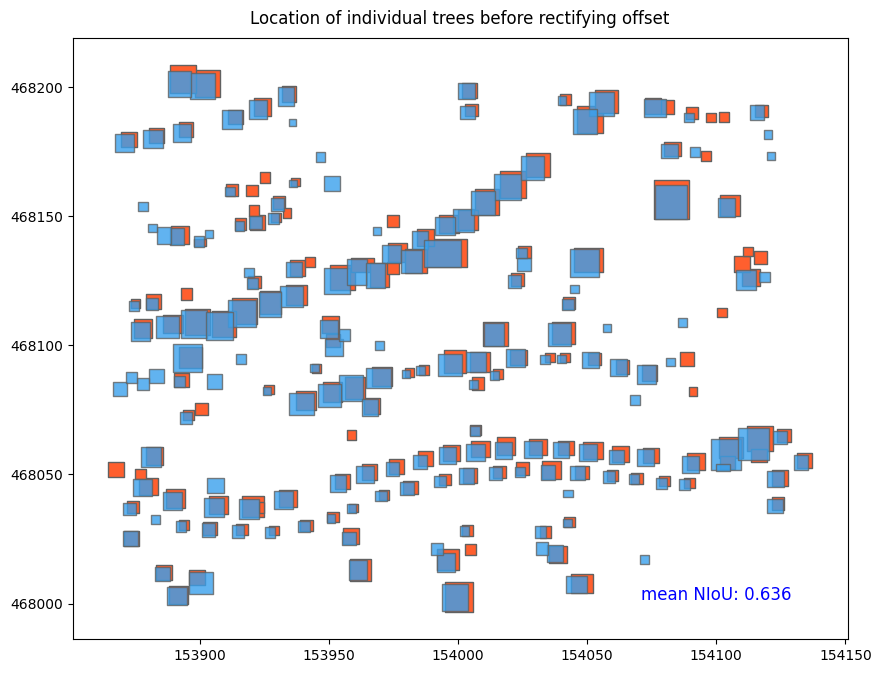

In [5]:
base = aerial_photos.plot(color=color_1, edgecolor=edgecolor)
LiDAR.plot(ax=base, color=color_2,
           edgecolor=edgecolor, alpha = alpha)
Title = "Location of individual trees before rectifying offset"
plt.title(Title, fontsize=fontsize, pad=pad)
NIoU = LiDAR_rectified.NIoU
plt.text(154100, 468000, f'mean NIoU: {np.mean(NIoU[NIoU>0]):.3f}', 
         ha='center', va='bottom', color='blue', fontsize=fontsize)
plt.show()

### 2.2 after rectification

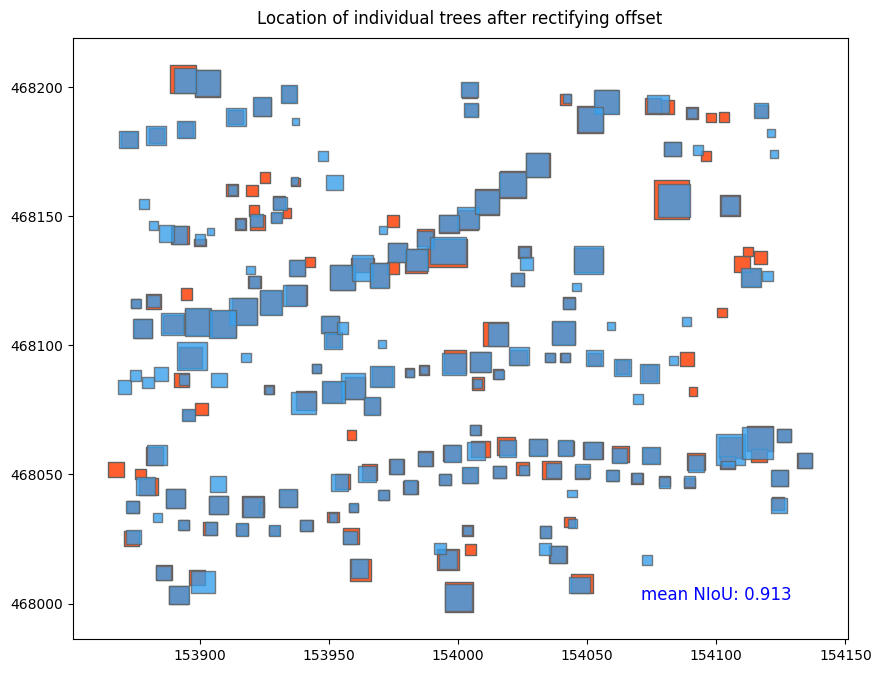

In [6]:
base = aerial_photos.plot(color=color_1, edgecolor=edgecolor)
LiDAR_rectified.plot(ax=base, color=color_2, 
                     edgecolor=edgecolor, alpha = alpha)
Title = "Location of individual trees after rectifying offset"
plt.title(Title, fontsize=fontsize, pad=pad)
NIoU = LiDAR_rectified.tar_niou
plt.text(154100, 468000, f'mean NIoU: {np.mean(NIoU[NIoU>0]):.3f}', 
         ha='center', va='bottom', color='blue', fontsize=fontsize)
plt.show()